In [247]:
!pip install mlxtend

In [248]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

## Generate data
I will generate random data to create my first perceptron. For that, I'll use the function make_classification, designed to create syntetic data for classification tasks.



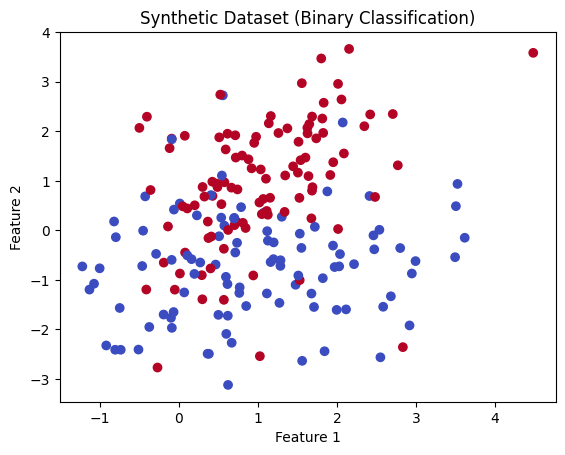

In [249]:
# Generate a synthetic dataset
X, y = make_classification(n_samples=200, n_features=2,
                           n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, flip_y=0.1,
                           class_sep=1.0, random_state=42)

# Convert target to -1 and 1 for perceptron
y = np.where(y == 0, -1, 1)

# Visualize the two classes in the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Dataset (Binary Classification)')
plt.show()

## Train the Perceptron

In [250]:
class Perceptron(object):
    def __init__(self, eta = .5, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):
        self.w_ = np.random.rand(1 + X.shape[1])

        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update*xi
                self.w_[-1] -= update
                errors += int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors_.append(errors)

        return self

    def net_input(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [251]:
# Train the perceptron

perceptron1 = Perceptron(eta=0.1, epochs=100)
perceptron1.train(X, y)


## Evaluate results

In [252]:
# Make predictions
y_hat = perceptron1.predict(X)
print(y_hat == y)

[ True  True False  True  True  True  True  True  True  True False False
 False  True  True  True False False False False False False False False
  True False  True False False  True False  True False False  True  True
  True False False  True False  True False  True False False False False
  True  True False  True False False  True  True False  True False False
  True False  True False False  True  True False  True False False  True
  True  True  True False  True  True  True False False  True  True  True
  True False  True  True  True False  True  True  True  True  True  True
 False  True False False False  True False False False  True  True False
  True  True False False  True  True  True False  True False False  True
  True  True  True False  True  True  True False False  True  True False
  True  True  True  True  True False  True  True False False  True  True
  True  True  True False False False False  True False  True False False
  True  True  True  True  True  True  True  True  T

In [253]:
accuracy = np.sum(y == y_hat) / len(y_hat)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.61


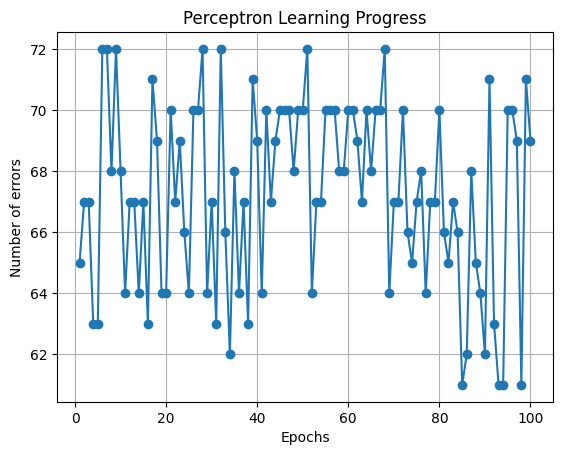

In [254]:
plt.plot(range(1, len(perceptron1.errors_) + 1), perceptron1.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of errors')
plt.title('Perceptron Learning Progress')
plt.grid(True)
plt.show()

In [255]:
# Define a second perceptron with a different learning rate and epochs
perceptron2 = Perceptron(eta=0.8, epochs=100)
perceptron2.train(X, y)

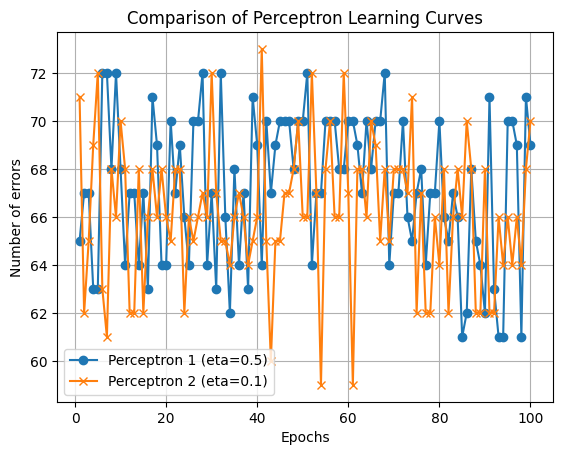

In [256]:
# Plot the learning curves of both perceptrons
plt.plot(range(1, len(perceptron1.errors_) + 1), perceptron1.errors_, marker='o', label='Perceptron 1 (eta=0.5)')
plt.plot(range(1, len(perceptron2.errors_) + 1), perceptron2.errors_, marker='x', label='Perceptron 2 (eta=0.1)')

plt.xlabel('Epochs')
plt.ylabel('Number of errors')
plt.title('Comparison of Perceptron Learning Curves')
plt.legend()
plt.grid(True)
plt.show()

# Questions:

Is it ok that I get a bigger error at the end compared to the beggining?